# photo

In [1]:
import numpy as np
from ROOT import TCanvas, TGraphErrors, TF1, TGraph,TLatex,TMultiGraph
from ROOT import gROOT
from array import array

Welcome to JupyROOT 6.16/00


In [2]:
v=[50,100,150,200,250,300,350,400,450,500,550,600]
c=[10,8,6,4,2.6,1.8,1.2,0.6,0.2,-0.04,-0.2,-0.4]
verr=[]
cerr=[]
for i in range(0,len(c)):
    verr.append(1)
    if abs(c[i])>2.7:
        cerr.append(2)
    elif abs(c[i])>0.2:
        cerr.append(0.2)
    elif abs(c[i])>0.02:
        cerr.append(0.02)
    else:
        cerr.append(0.002)
print(len(v))
print(verr)
print(cerr)

12
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 2, 2, 2, 0.2, 0.2, 0.2, 0.2, 0.02, 0.02, 0.02, 0.2]


In [3]:
v  =  array( 'f', v)
c  =  array( 'f', c)
verr= array('f',verr)
cerr=array('f',cerr)

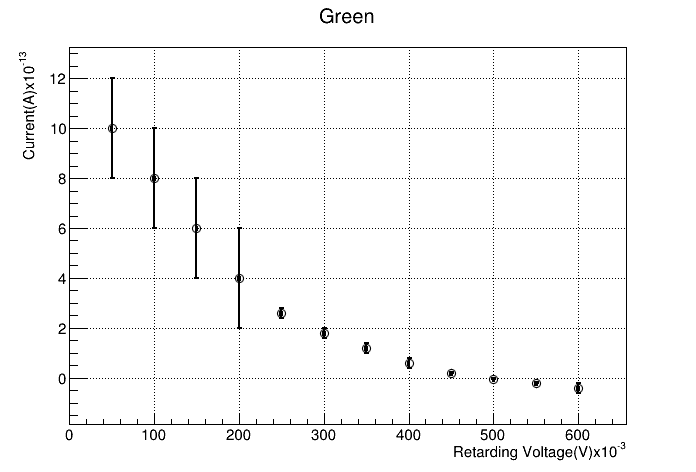

In [4]:
c1 = TCanvas( 'c1', '..', 200, 10, 700, 500 )
c1.SetGrid()
             
gr = TGraphErrors(len(v),v,c,verr,cerr)
gr.Draw("AP")
gr.SetTitle('Green')
gr.SetLineColor( 1 )
gr.SetLineWidth( 2 )
gr.SetMarkerColor( 1 )
gr.SetMarkerStyle( 4 )

gr.GetXaxis().SetTitle( 'Retarding Voltage(V)x10^{-3}' )
gr.GetYaxis().SetTitle( 'Current(A)x10^{-13} ' )

c1.Draw()

 FCN=0.0595706 FROM MIGRAD    STATUS=CONVERGED      47 CALLS          48 TOTAL
                     EDM=1.97766e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.16028e+01   1.83122e+00   1.00108e-04   9.90594e-04
   2  p1          -3.60275e-02   7.42889e-03   4.06128e-07   2.39341e-01
 FCN=0.0380388 FROM MIGRAD    STATUS=CONVERGED      49 CALLS          50 TOTAL
                     EDM=4.48641e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.57210e+00   2.94840e-01   7.10802e-06   1.45451e-04
   2  p1          -3.22342e-03   5.60535e-04   1.35134e-08   9.29041e-02


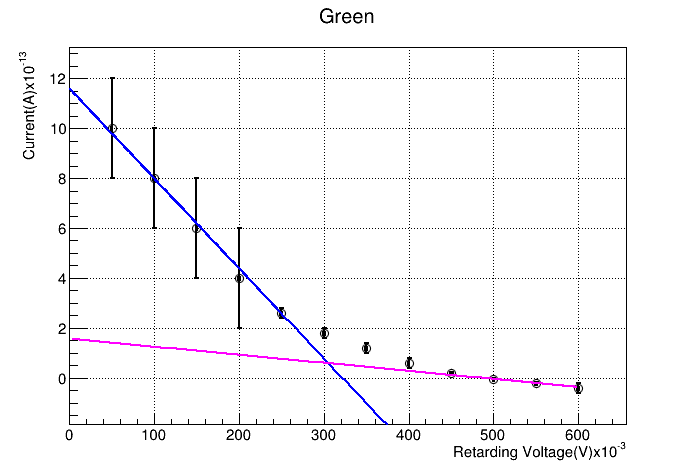

In [5]:
l1=TF1('l1','pol1',0,600)
l1.SetLineColor( 4 )
gr.Fit('l1','','',0,250)
l2=TF1('l2','pol1',0,600)
l2.SetLineColor( 6 )
gr.Fit('l2','+','',500,600)

l1.Draw('same')
l2.Draw('same')


c1.Draw()

In [6]:
m1=[-4.0*(10**(-14)),-8.0*(10**(-13)),-3.6*(10**(-12)),-2.4*(10**(-13)),-6.4*(10**(-12))]
n1=[16*(10**(-15)),26.7*(10**(-14)),11.6*(10**(-13)),10.5*(10**(-14)),41.3*(10**(-13))]
m2=[5*(10**(-15)),-1.6*(10**(-13)),3.2*(10**(-13)),-2.4*(10**(-14)),-2.8*(10**(-13))]
n2=[-2.7*(10**(-15)),6.2*(10**(-14)),1.6*(10**(-13)),1.7*(10**(-14)),2.8*(10**(-13))]
sm1=[0.4*(10**(-14)),0.95*(10**(-13)),0.74*(10**(-12)),0.9*(10**(-13)),0.4*(10**(-12))]
sn1=[1.5*(10**(-15)),1.8*(10**(-14)),1.8*(10**(-13)),1.8*(10**(-14)),1.3*(10**(-13))]
sm2=[4*(10**(-15)),0.4*(10**(-13)),0.6*(10**(-13)),0.6*(10**(-14)),0.5*(10**(-13))]
sn2=[1.9*(10**(-15)),1.6*(10**(-14)),0.3*(10**(-13)),0.4*(10**(-14)),0.6*(10**(-13))]
x=[]
sx=[]
sn=[]
sm=[]
sf=[]

for i in range(0,len(m1)):
    x.append((n2[i]-n1[i])/(m1[i]-m2[i]))
    sn.append(np.sqrt(sn2[i]**2+sn1[i]**2))
    sm.append(np.sqrt(sm2[i]**2+sm1[i]**2))
    sx.append(np.sqrt(((sn[i]**2)/(m1[i]-m2[i])**2)+((n2[i]-n1[i])*sm[i]/(m1[i]-m2[i])**2)**2))
    sf.append(0)
print(x)
print(sx)
f=[4.31*(10**(14)),5.19*(10**(14)),5.49*(10**(14)),6.08*(10**(14)),6.88*(10**(14))]
x  =  array( 'f', x)
f  =  array( 'f', f)
sf  =  array( 'f', sf)
sx  =  array( 'f', sx)
print(sf)
print(f)



[0.4155555555555556, 0.3203125, 0.2551020408163265, 0.4074074074074074, 0.6290849673202614]
[0.07498465828964088, 0.06385496179999368, 0.06709254996770853, 0.19034590072588528, 0.047584951811243066]
array('f', [0.0, 0.0, 0.0, 0.0, 0.0])
array('f', [431000001708032.0, 518999989288960.0, 549000000307200.0, 607999999606784.0, 688000006619136.0])


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


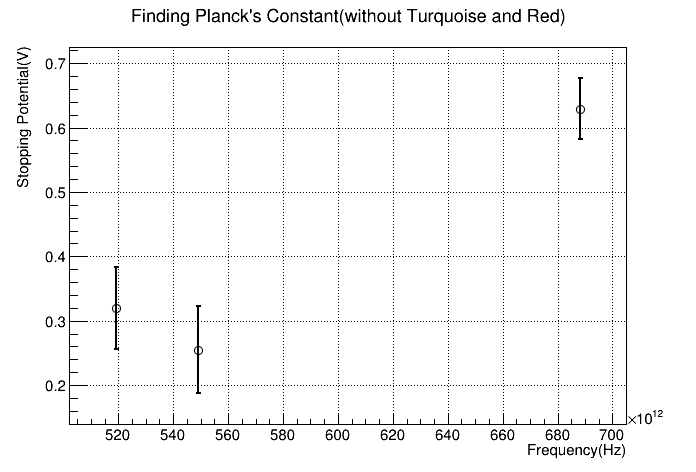

In [16]:
x=[ 0.3203125, 0.2551020408163265, 0.6290849673202614]
sx=[ 0.06385496179999368, 0.06709254996770853, 0.047584951811243066]
f=[5.19*(10**(14)),5.49*(10**(14)),6.88*(10**(14))]
sf=[0,0,0]

x  =  array( 'f', x)
f  =  array( 'f', f)
sf  =  array( 'f', sf)
sx  =  array( 'f', sx)

c2 = TCanvas( 'c2', '..', 200, 10, 700, 500 )
c2.SetGrid()
             
gr1 = TGraphErrors(len(x),f,x,sf,sx)
gr1.Draw("AP")
gr1.SetTitle("Finding Planck's Constant(without Turquoise and Red)")
gr1.SetLineColor( 1 )
gr1.SetLineWidth( 2 )
gr1.SetMarkerColor( 1 )
gr1.SetMarkerStyle( 4 )

gr1.GetXaxis().SetTitle( 'Frequency(Hz)' )
gr1.GetYaxis().SetTitle( 'Stopping Potential(V)' )

c2.Draw()


****************************************
Minimizer is Linear
Chi2                      =      1.96496
NDf                       =            1
p0                        =    -0.831238   +/-   0.260567    
p1                        =    2.113e-15   +/-   4.24774e-16 


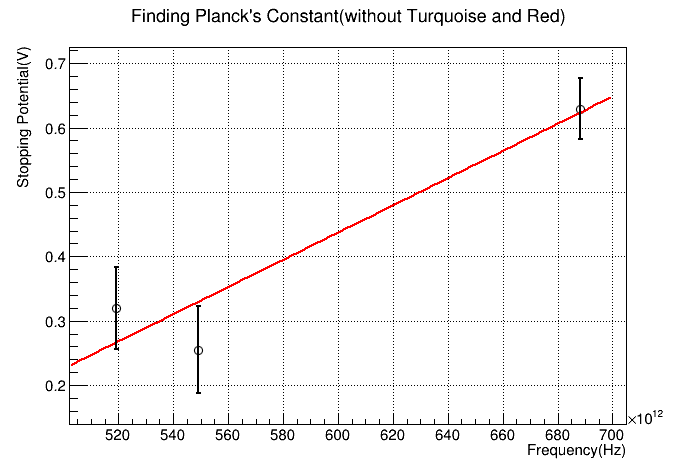

In [17]:
l3=TF1('l3','pol1',0,600)
l3.SetLineColor( 2 )
gr1.Fit('l3','','',0,700*(10**(12)))

l3.Draw('same')
c2.Draw()